## Project 2 RLC Oscillations

Due Mon Nov 8, 9am

Objective: Use solve_ivp() to solve the differential equation governing a series RLC circuit.

Please refer to the Project 2 background document on Canvas, as well as the project marking rubric.



# Initial Set-up
1) Choose random values of L and C. To do this, start by generating a random integer, $I_r$, between -4 and -8 for the exponent and a random floating point number, $F_r$ between 0 and 1. The inductance is then given by $F_{r1}$ x 10$^{I_{r1}}$ Henries. Then generate two new random numbers by the same method for the capacitance, which will be given by $F_{r2}$ x 10$^{I_{r2}}$ Farads.

Then calculate three values of R, to represent the underdamped, critically damped and overdamped cases (take  m = 0.1, 1, and 5 in $R=2m\sqrt{L/C}$).


In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

"""Definition of randomized inductor and capacitor values"""

# random power(I_l) and value(F_l) for inductor
I_l = np.random.randint(-8, -4)
F_l = np.random.uniform(0, 1)

L = F_l*10**I_l  # inductor value in Henries

# random power(I_c) and value(F_c) for capacitor
I_c = np.random.randint(-8, -4)
F_c = np.random.uniform(0, 1)

C = F_c*10**I_c  # capacitor value in Farads

R = np.zeros(3)
m = [0.1, 1, 5]
for e in range(3):  # puts under, critically and over damped resitances in R
    R[e] = 2*m[e]*np.sqrt(L/C)


2) Generate a figure that shows the time evolution of I(t) for the three cases above, with a 1V peak-to-peak sinusoidal excitation ($2V_0 = 1$ V) at $\omega = \omega_0$.  Start with the inital conditions: q(0) = I(0) = 0. In these figures you should show the transient behaviour and the transition to stable oscillation. The figure should be three vertically stacked subplots, each showing the behaviour for one value of m.

Make sure you that your code chooses the time interval and time steps wisely so that it captures the behaviour of the oscillator. One challenge is to write the program so that it will work well with any of the large range of possible L and C values and still generate plots showing the requested features. You should test your code with the Validate button several times, which should generate new random values of L and C to ensure that your plots look good each time.

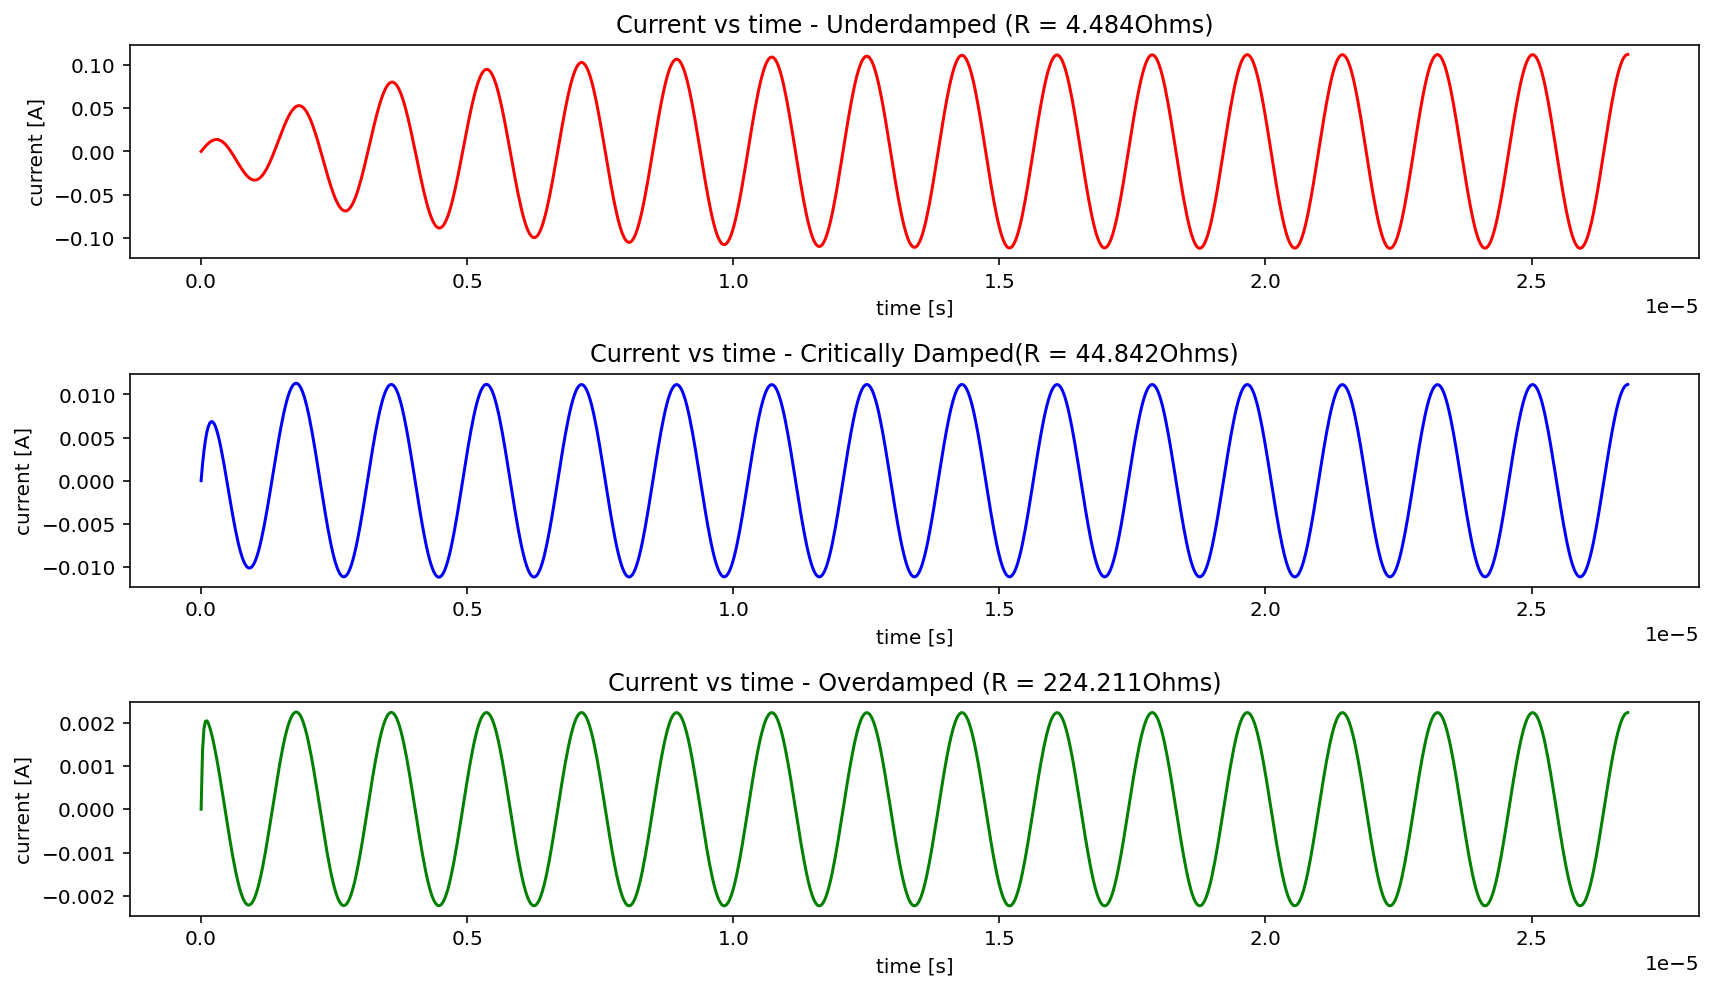

In [2]:
"""
PURPOSE
Solve the Ordinary differential equations (ODE) for current and charge
in an LRC circuit with randomly generated inductor and capacitor values,
some given initial voltage (V_0) and some initial state of charge (q_0) and
current (I_0) in the circuit. We define three resistances which cause the
circuitto be underdamped, critically damped, and over damped respectively.
This is done using integrate.solve_ivp() from Scipy. From solving the ODEs
we plot the current vs time for each resistor at the resonant frequency.

METHOD:
Set constants for initial volatage, charge and current as well as the resonant
frequency

Define the function which computes the ODEs at each time step

Intgrate.solve_ivp is called three times for each resistance. It provides the
charge and current at each time step. The current values are then plotted
against the time steps while current is positive.
"""

# CONSTANTS ==========

V_0 = 1/2             # intial voltage amplitude in V
omg = 1/np.sqrt(L*C)  # resonant frequency in Hz
q_0 = 0               # initial charge in coulombs
I_0 = 0               # initial current in amperes

# FUNCTIONS ==========


def dqdtAF(tAF, valAF, R, omega):
    """
    Returns the ODE for charge and current at a given time step tAf

    Inputs:
        tAF: the given time step for an iteration
        valAF: a numpy array containing a charge and current value
        R: the resistor value used in the computation
        omega: the frequency used in the computation

    Outputs:
        numpy array containing:
            I: the derivative of the charge value
            I_t: the derivative of the current value based on the
                 circuit and Voltage that varies with time.
    """
    q_i = valAF[0]  # charge for this iteration
    I_i = valAF[1]  # current for this iteration
    V_t = V_0*np.cos(omega*tAF)
    I_t = 1/L*V_t - R/L*I_i - 1/(L*C)*q_i
    return np.array([I_i, I_t])


# PROBLEM SOLUTION ============

# time values ------------
t_0 = 0
t_f = 15*2*np.pi*np.sqrt(L*C)  # final time - generates 15 oscillations
steps = 1000
tAF = np.linspace(t_0, t_f, steps)  # range of times

# initial values ---------
valAF_0 = np.array([q_0, I_0])


# SOLVE DATA ------------

# underdamped solution
sol_u = integrate.solve_ivp(dqdtAF, (t_0, t_f), valAF_0, t_eval=tAF,
                            method="LSODA", args=(R[0], omg))
# critically damped solution
sol_c = integrate.solve_ivp(dqdtAF, (t_0, t_f), valAF_0, t_eval=tAF,
                            method="LSODA", args=(R[1], omg))
# overdamped solution
sol_o = integrate.solve_ivp(dqdtAF, (t_0, t_f), valAF_0, t_eval=tAF,
                            method="LSODA", args=(R[2], omg))

# time values
tvals = sol_u['t']
# Underdamped current values
IAFu = sol_u['y'][1]
# Critically damped current values
IAFc = sol_c['y'][1]
# OVerdamped current values
IAFo = sol_o['y'][1]

# PLOTTING GRAPHS ============

# Underdamped plot
plt.subplot(3, 1, 1)
plt.plot(tvals, IAFu, "r-")
plt.ylabel("current [A]")
plt.xlabel("time [s]")
plt.title("Current vs time - Underdamped (R = {:3.3f}Ohms)".format(R[0]))

# Critically damped plot
plt.subplot(3, 1, 2)
plt.plot(tvals, IAFc, "b-")
plt.ylabel("current [A]")
plt.xlabel("time [s]")
plt.title("Current vs time - Critically Damped(R = {:3.3f}Ohms)".format(R[1]))

# Overdamped plot
plt.subplot(3, 1, 3)
plt.plot(tvals, IAFo, "g-")
plt.ylabel("current [A]")
plt.xlabel("time [s]")
plt.title("Current vs time - Overdamped (R = {:3.3f}Ohms)".format(R[2]))

plt.tight_layout()
plt.show()

 3) Generate another figure containing three resonance plots, as three vertically stacked subplots. Each panel should show a plot of the current, I, vs frequency for a range from $0.1\omega_0/2\pi$  to $2\omega_0/2\pi$. The three panels should show the resonance curves for the same three cases described above. For each point you plot, the I you take should represent the peak-to-peak response for a peak-to-peak drive amplitude of 1V ($2V_0$ = 1V), after the transient behaviour has died away and the solution stabilizes to a steady sinusoidal oscillation. Your calculations should be made at frequencies spaced closely enough that when plotted with a continuous line, the curves are smooth. The values of R, L and C should be indicated in the titles of each panel. The plots should use Hz units ($\omega/2\pi$).

This will require calling `solve_ivp()` numerous times and will require more cpu time to execute than anything we have seen so far, though should in total not take more than a minute or so.



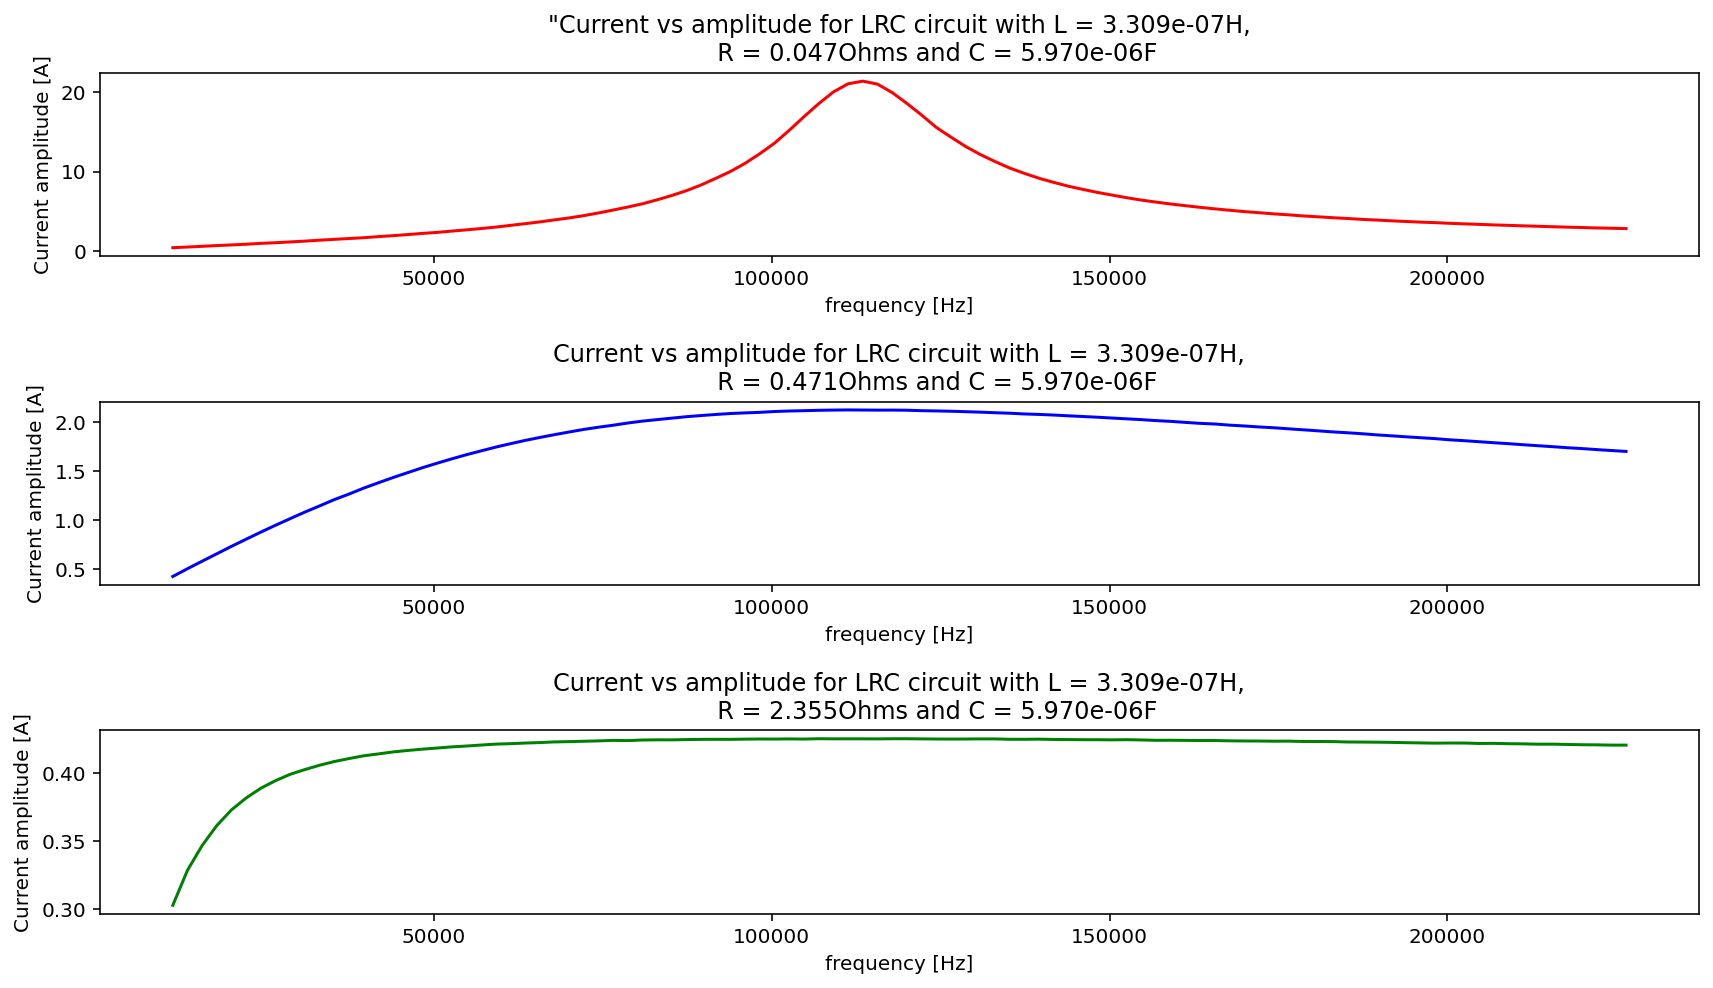

In [7]:
"""
OBJECTIVE:
Use ODEs for charge and current to generate three resonance plots over a
range of frequencies for the three aforementioned resistors. Capacitance,
inductance, initial voltage, intial charge, initial current and time are
identical to part 2.

METHOD:
Use previously defined ODE function. For each resistance repeatedly call
integrate.solve_ivp() over given range of frequencies. Find peak to peak
current at each frequency once the signal has stabilized and store each
amplitude in an array. Each array of amplitudes are stored seperately for
each resistor.
Plot the current amplitudes against the set of frequencies for each
resistor.
"""

# CONSTANTS ===========
# frequencies
omg_0 = 0.1*omg  # initial
omg_f = 2*omg    # final
steps_f = 100    # steps (f distinguishes it from steps in previous cell)
omgAF = np.linspace(omg_0, omg_f, steps_f)  # range

# SOLUTION ============

arr = np.empty(len(omgAF))
# arrays to store amplitudes for each resistor
amps = np.array([arr, arr, arr])

# filling arrays with values
for j in range(len(R)):  # iterates through resistors
    for i in range(len(omgAF)):   # iterates through frequencies
        # solution for jth resistor and ith frequency
        sol = integrate.solve_ivp(dqdtAF, (t_0, t_f), valAF_0, t_eval=tAF,
                                  method="LSODA", args=(R[j], omgAF[i]))
        y = sol['y'][1]  # all current values

        """this is to idex the second half of the current values when the
        signal is stable. Needed if I_0 > stable signal's maximum
        """
        half = int(len(y)/2)
        maxI = np.amax(y[half:])  # max in stabilized signal
        minI = np.amin(y[half:])  # min in stabilized signal
        amp = maxI - minI         # peak to peak amplitude
        amps[j][i] = amp


# PLOTTING ==============

# Resonance plot for underdamped
plt.subplot(311)
plt.plot(omgAF/(2*np.pi), amps[0], 'r-')
plt.xlabel("frequency [Hz]")
plt.ylabel("Current amplitude [A]")
plt.title(""""Current vs amplitude for LRC circuit with L = {0:3.3e}H,
          R = {1:3.3f}Ohms and C = {2:3.3e}F""".format(L, R[0], C))

# Resonance plot for critically damped
plt.subplot(312)
plt.plot(omgAF/(2*np.pi), amps[1], 'b-')
plt.xlabel("frequency [Hz]")
plt.ylabel("Current amplitude [A]")
plt.title("""Current vs amplitude for LRC circuit with L = {0:3.3e}H,
          R = {1:3.3f}Ohms and C = {2:3.3e}F""".format(L, R[1], C))

# Resonance plot for underdamped
plt.subplot(313)
plt.plot(omgAF/(2*np.pi), amps[2], 'g-')
plt.xlabel("frequency [Hz]")
plt.ylabel("Current amplitude [A]")
plt.title("""Current vs amplitude for LRC circuit with L = {0:3.3e}H,
          R = {1:3.3f}Ohms and C = {2:3.3e}F""".format(L, R[2], C))

plt.tight_layout()
plt.show()

# Acknowledgements
Please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."

Max helped me with using args(R[n]) and adding the R parameter in my dqdtAF function


All solution code for the main project question should appear above this cell.
Project extensions should appear in the cell below.

In [4]:
# OPTIONAL project extension (which can call functions in your code above if desired) here.
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Extension Description

Please describe any new language features or project extension you have implemented in this cell.



Code executes - grader use only

YOUR ANSWER HERE

In [8]:
# pep8 returns warnings or errors
nb_name = "project2.ipynb"
cells_to_check = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']

# check_style.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-project2-1
checking cell: cell-project2-2
checking cell: cell-project2-3


<Figure size 864x504 with 0 Axes>

Results Grade - grader use only

YOUR ANSWER HERE

Comments, naming, readability - grader use only

YOUR ANSWER HERE

Plots - grader use only

YOUR ANSWER HERE

Code compactness and organization - grader use only

YOUR ANSWER HERE

Time for cell: cell-project2-1 time: 0.00


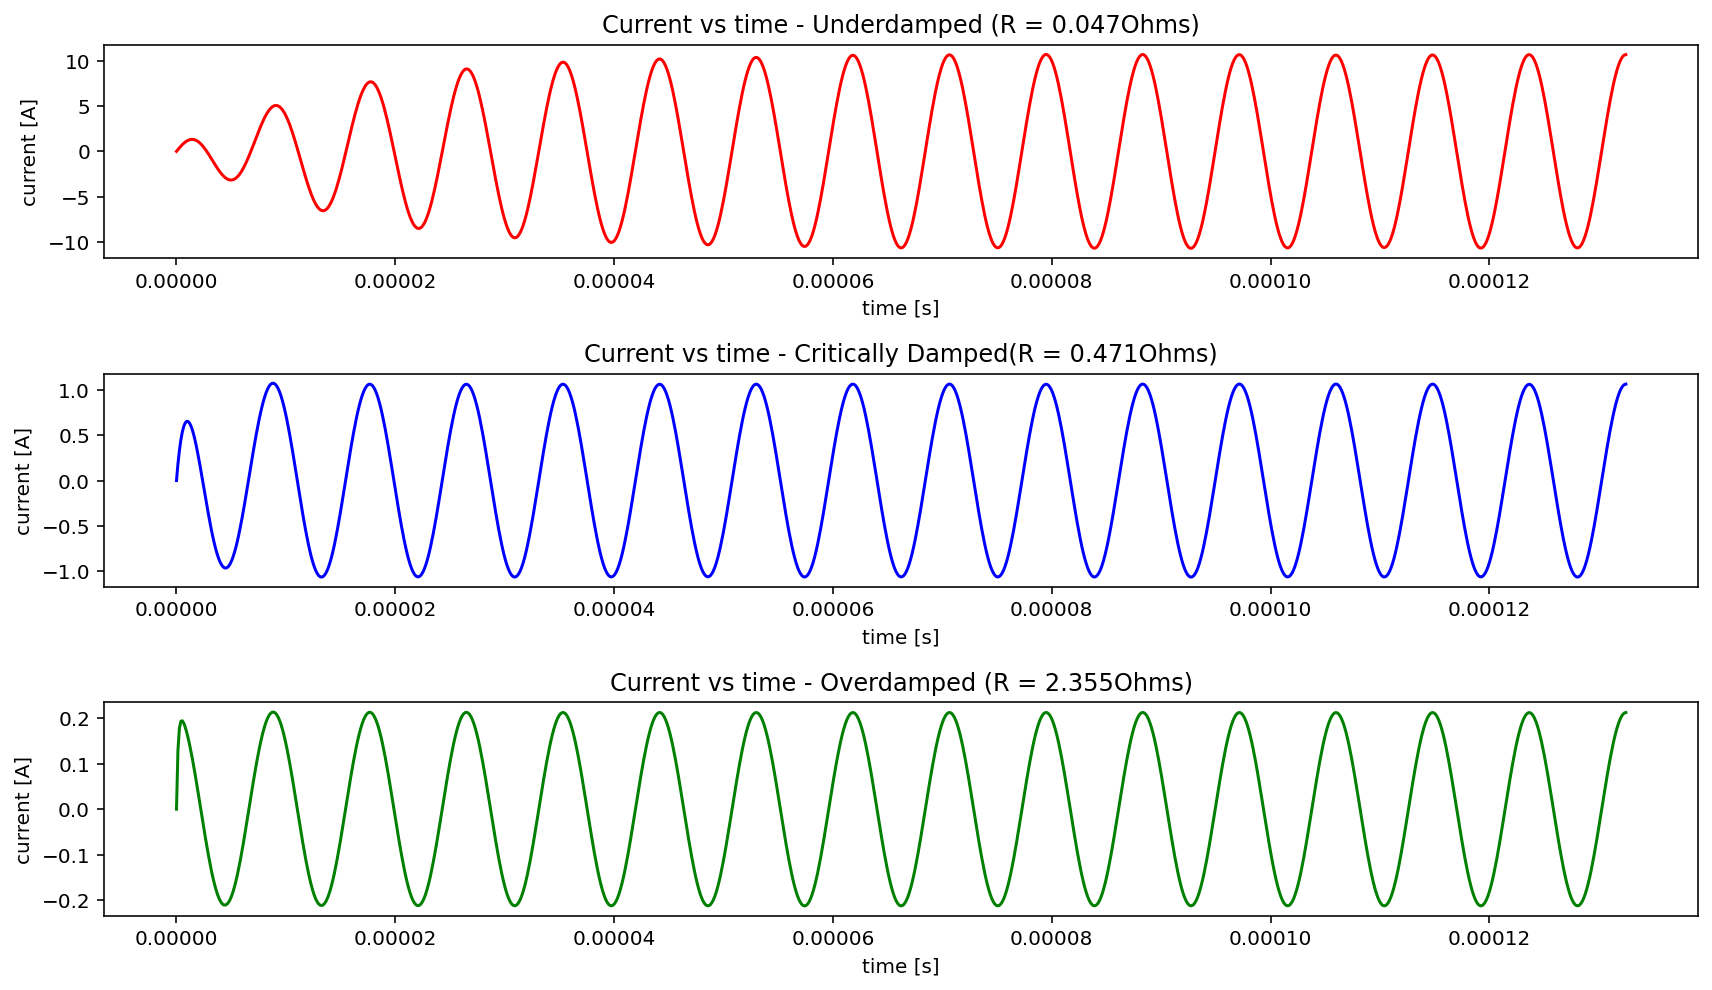

Time for cell: cell-project2-2 time: 0.95


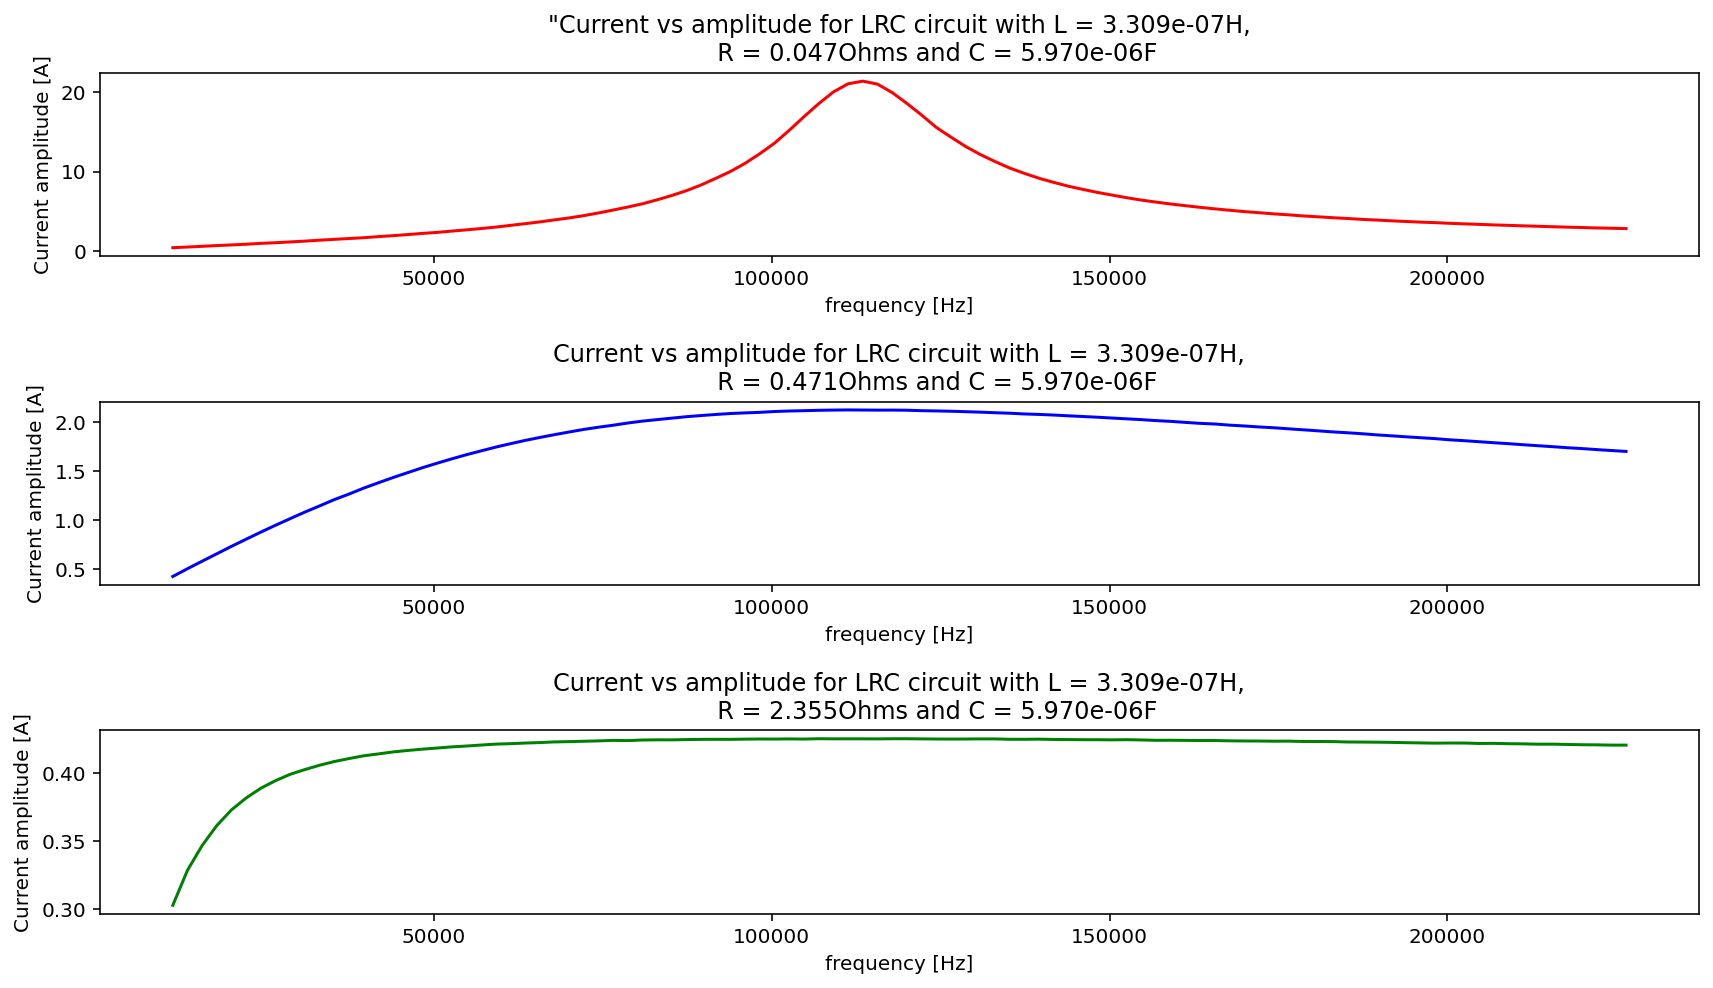

Time for cell: cell-project2-3 time: 13.69
Total time: 14.65


<Figure size 864x504 with 0 Axes>

In [6]:
# Code optimization/speed
cells_to_time = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']
# also uses nb_name
%run -i time_cells2.py

Code optimization/timing - grader use only

YOUR ANSWER HERE

New Functionality/Language features - grader use only

YOUR ANSWER HERE